In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl


#axes.xaxis.set_tick_params(direction='in', which='both')
#axes.yaxis.set_tick_params(direction='in', which='both')
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 0.1
mpl.rcParams["figure.dpi"] = 130
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='large')
rc('ytick', labelsize='large')
def cm2inch(value):
    return value/2.54

In [3]:
from mpmath import acosh, sinh, nsum, inf, power
import mpmath as mp
mp.dps = 1000

In [4]:
z= 1e-6
a = 1.5e-6
D0 = 4e-21 / (6*np.pi * 0.001 * a)
kT = 4e-21

In [5]:
def Dx(eta, z, a):
    xi = a/ (z + a)
    etax = eta / (1 - 9/16 *xi  + 1/8 * xi ** 3 - 45/256 *xi **4 - 1/16 * xi ** 5)
    return kT / (6 * np.pi * etax * a)

In [6]:
def Dz(eta, z, a):
    z = (z + a) / a
    beta = float(acosh(z))
    summ = nsum(
        lambda n: (n * (n + 1) / ((2 * n - 1) * (2 * n + 3)))
        * (
            (
                (2 * sinh((2 * n + 1) * beta) + (2 * n + 1) * sinh(2 * beta))
                / (
                    4 * (sinh((n + 1 / 2) * beta) ** 2)
                    - ((2 * n + 1) ** 2) * (sinh(beta) ** 2)
                )
            )
            - 1
        ),
        [0, inf],
    )
    summ = float(summ)
    return kT / (6 * np.pi * eta * 4 / 3 * float(sinh(beta)) * summ * a)

In [7]:
def Dz_pade(eta, z, a):
    etaz = eta * (6 * z ** 2 + 9 * a * z + 2 * a ** 2) / (6 * z ** 2 + 2 * a * z)
    return kT / (6 * np.pi * etaz * a)

In [8]:
def Dz_small_z(eta, z, a):
    etaz =  eta  *a / z
    return kT / (6 * np.pi * etaz * a)

In [9]:
zs = np.linspace(1e-9, 100e-6, 10000)
D = np.array([Dz(0.001, z, 1.5e-6) for z in zs ])
D_pade = np.array([Dz_pade(0.001, z, 1.5e-6) for z in zs])
D_small = np.array([Dz_small_z(0.001, z, 1.5e-6) for z in zs])
Dx = np.array([Dx(0.001, z, 1.5e-6) for z in zs])

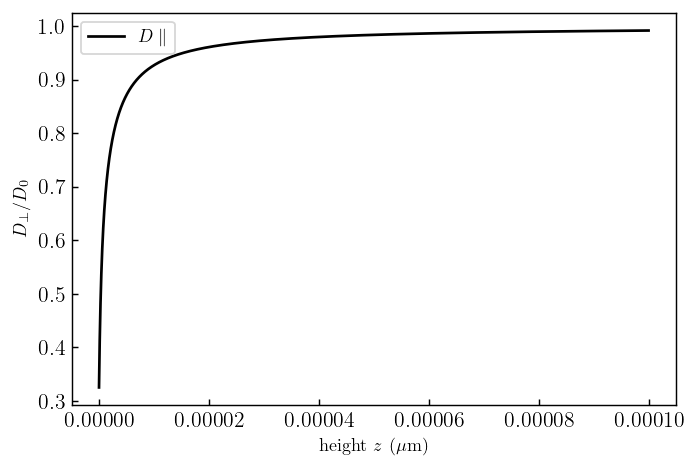

In [10]:
plt.plot(zs, Dx/ D0, label = "$D\\parallel$", color = "k")
plt.xlabel("height $z$ ($\mu$m)")
plt.ylabel("$D_\\bot / D_0$")
plt.legend()

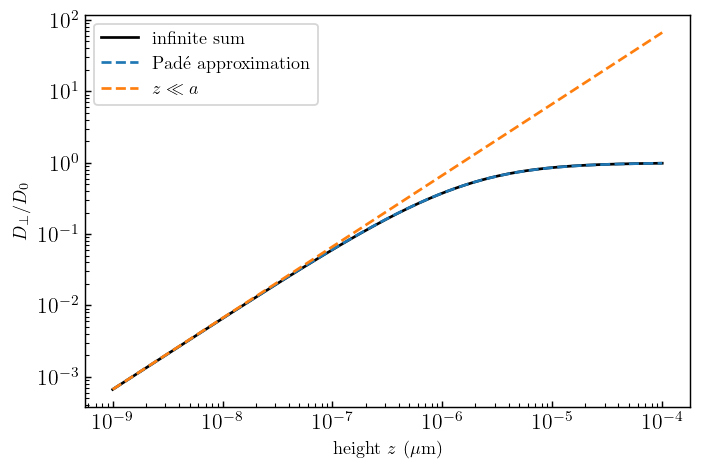

In [11]:
plt.plot(zs, D/ D0, label = "infinite sum", color = "k")
plt.plot(zs, D_pade/ D0, "--", label="Padé approximation")
plt.loglog(zs, D_small / D0, "--", label = "$z \ll a$")
plt.xlabel("height $z$ ($\mu$m)")
plt.ylabel("$D_\\bot / D_0$")
plt.legend()

In [12]:
relat_D_pade = np.abs(D - D_pade) / D * 100
relat_D_small = np.abs(D_small - D_pade) / D * 100

Text(0, 0.5, 'relative error ($\\%$)')

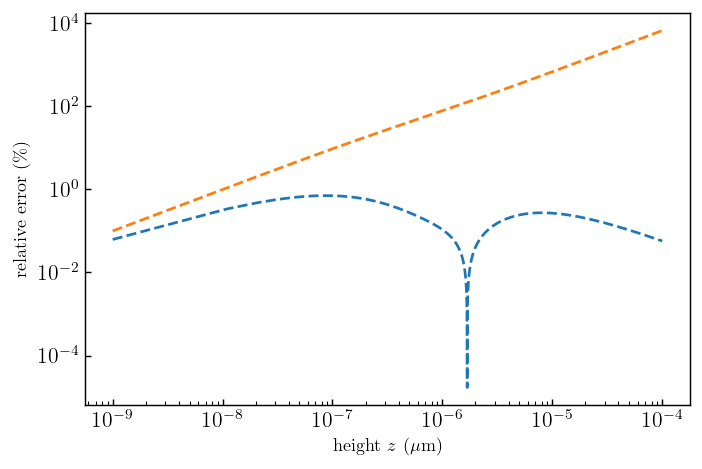

In [13]:
plt.plot(zs, relat_D_pade, "--")
plt.loglog(zs, relat_D_small, "--")
plt.xlabel("height $z$ ($\mu$m)")
plt.ylabel("relative error ($\%$)")

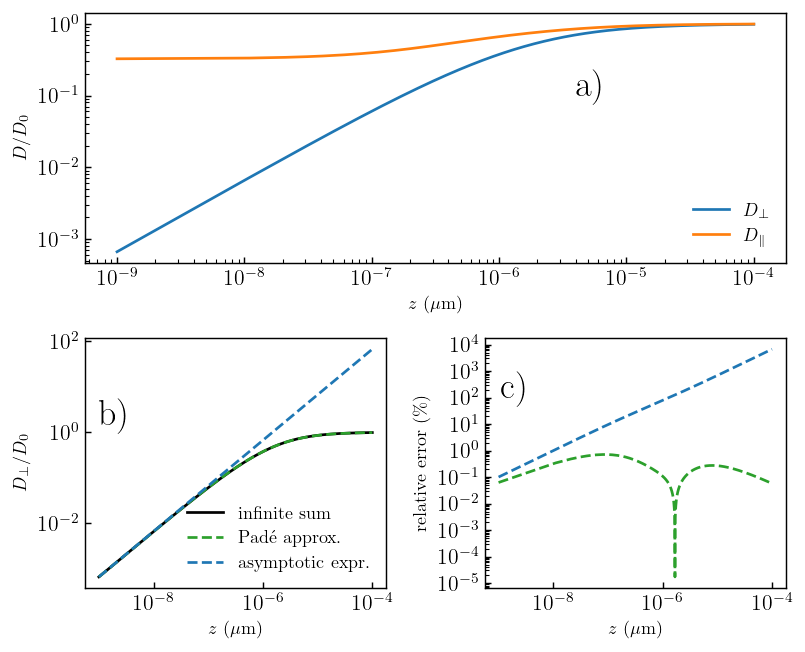

In [14]:
fig = plt.figure(figsize=(cm2inch(16),cm2inch(13)),constrained_layout=False)
gs = fig.add_gridspec(2,2)

fig.add_subplot(gs[1,0])

plt.plot(zs, D/ D0, label = "infinite sum", color = "k")
plt.plot(zs, D_pade/ D0, "--", label="Padé approx.", color="tab:green")
plt.loglog(zs, D_small / D0, "--", label = "asymptotic expr.")
plt.xlabel("$z$ ($\mu$m)")
plt.ylabel("$D_\\bot / D_0$")
plt.legend(frameon=False)
plt.text(1e-9, 1.5, "b)", fontsize=20)


fig.add_subplot(gs[1,1])


plt.plot(zs, relat_D_pade, "--", color="tab:green")
plt.loglog(zs, relat_D_small, "--")
plt.xlabel("$z$ ($\mu$m)")
plt.ylabel("relative error ($\%$)")

plt.text(1.1e-9, 100, "c)", fontsize=20)


ax = plt.gca()
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())



fig.add_subplot(gs[0,:])

plt.loglog(zs, D / D0, label = "$D_\\bot$",)
plt.plot(zs, Dx / D0, label = "$D_\\parallel$",)
plt.legend(frameon=False)
plt.xlabel("$z$ ($\mu$m)")
plt.ylabel("$D / D_0$")
ax = plt.gca()
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

plt.text(4e-6, 1e-1, "a)", fontsize=20)


plt.tight_layout()

plt.savefig("hindered_diffusion.pdf")

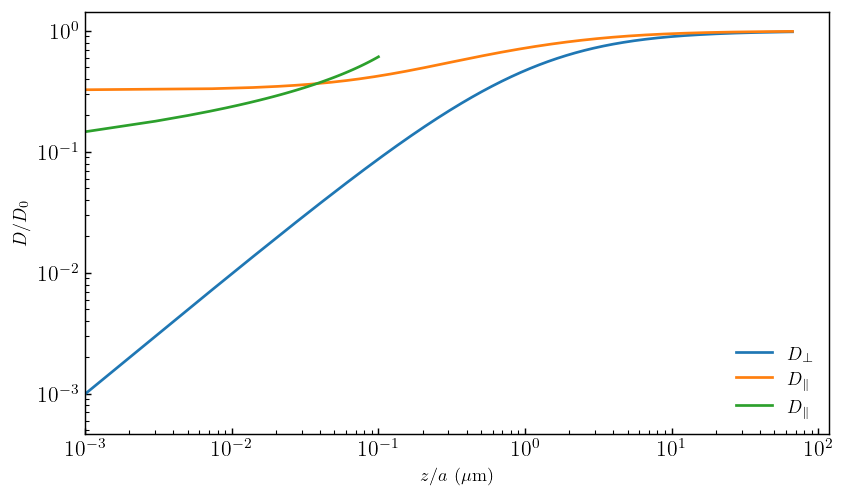

In [17]:
fig = plt.figure(figsize=(cm2inch(10*1.68),cm2inch(10)))
plt.loglog(zs/a, D / D0, label = "$D_\\bot$",)
plt.plot(zs/a, Dx / D0, label = "$D_\\parallel$",)
z_log = np.linspace(a*1e-3, 0.1*a)

Dx_log = np.array(-9/8*np.log(z_log/a) - 0.95429)**(-1)
#Dx_log2 = np.array(-9/8*np.log(z_log/a) - 0.95429 - 64/375 * (z_log/a) * np.log(z_log/a))**(-1)

z_log = np.linspace(a*1e-3, 0.1*a)
plt.plot(z_log/a, Dx_log, label = "$D_\\parallel$",)
#plt.plot(z_log/a, Dx_log2, label = "$D_\\parallel$",)


plt.legend(frameon=False)
plt.xlabel("$z/a$ ($\mu$m)")
plt.ylabel("$D / D_0$")
ax = plt.gca()
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
plt.xlim(1e-3, None)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
plt.tight_layout()
plt.savefig("diff.svg")

In [16]:
def 

SyntaxError: invalid syntax (Temp/ipykernel_17172/1885169875.py, line 1)

In [ ]:
a

In [ ]:
plt.plot(zs/a, Dx / D0, label = "$D_\\bot$",)
